<a href="https://colab.research.google.com/github/jaiminjariwala/Image-classification-Keras.CIFAR10-dataset/blob/main_code/Image_Classification_Keras_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [34]:
tf.test.is_built_with_cuda()

# if true this shows that we will be able to use GPU in our deep learning job

True

In [35]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [36]:
X_train.shape

(50000, 32, 32, 3)

In [37]:
X_test.shape

(10000, 32, 32, 3)

In [38]:
X_train[0].shape

(32, 32, 3)

In [39]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [40]:
def plot_sample(index):
  plt.figure(figsize = (8,3))
  plt.imshow(X_train[index])      # imshow is the 'image show function'

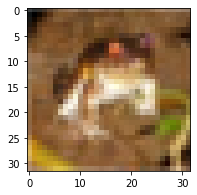

In [41]:
plot_sample(0)

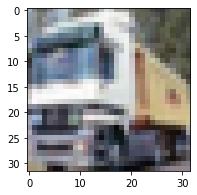

In [42]:
plot_sample(1)

In [43]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [44]:
classes[y_train[3][0]]

'deer'

In [45]:
y_train[3]

array([4], dtype=uint8)

In [46]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [47]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [48]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [49]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
y_test_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

In [51]:
# model building...
# 32*32*3 = 3072 neurons in input 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8078 - accuracy: 0.3569
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6240 - accuracy: 0.4251
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5418 - accuracy: 0.4573
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4827 - accuracy: 0.4783
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4317 - accuracy: 0.4958
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3899 - accuracy: 0.5115
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3511 - accuracy: 0.5245
Epoch 8/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3155 - accuracy: 0.5379
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2854 - accuracy: 0.5498
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.254

In [52]:
classes[np.argmax(model.predict(X_test_scaled)[2])]

313/313 [==============================] - 1s 2ms/step


'airplane'

In [53]:
classes[y_test[2][0]]

'ship'